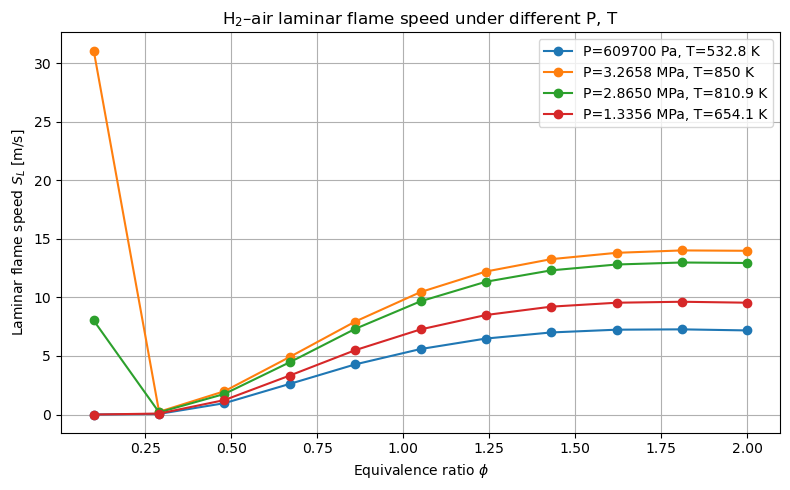

Saved all curves to flame_speeds_multi.csv


In [31]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 四组 (压力 [Pa], 温度 [K], 标签)
conditions = [
    (609700,  532.8, 'P=609700 Pa, T=532.8 K'),
    (3265800, 850.0, 'P=3.2658 MPa, T=850 K'),
    (2865000, 810.9, 'P=2.8650 MPa, T=810.9 K'),
    (1335600, 654.1, 'P=1.3356 MPa, T=654.1 K'),
]

# 当量比
n_phi = 11
phis = np.linspace(0.1, 2.0, n_phi)

# 机理文件
gas = ct.Solution('/data/ZhuXu/Cantera/NeuralRecon/mechanism/H2_Li.yaml')

# 存储所有结果的字典，用于 DataFrame
results = {'phi': phis}

plt.figure(figsize=(8,5))
for P, T, label in conditions:
    speeds = np.zeros_like(phis)
    for i, phi in enumerate(phis):
        gas.TP = T, P
        gas.set_equivalence_ratio(phi,
                                  fuel={'H2': 1},
                                  oxidizer={'O2': 1, 'N2': 3.76})
        rho_u = gas.density
        flame = ct.FreeFlame(gas, width=0.03)
        flame.set_refine_criteria(ratio=3, slope=0.06, curve=0.12)
        flame.solve(loglevel=0, auto=True)
        speeds[i] = flame.velocity[0]
    # 绘图
    plt.plot(phis, speeds, 'o-', label=label)
    # 加入到 results 中，列名可以简写为 SL_<P>_<T>
    colname = f"SL_{int(P/1e5)}bar_{int(T)}K"
    results[colname] = speeds

# 格式化绘图
plt.xlabel('Equivalence ratio $\\phi$')
plt.ylabel('Laminar flame speed $S_L$ [m/s]')
plt.title('H$_2$–air laminar flame speed under different P, T')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 保存为 CSV
df = pd.DataFrame(results)
csv_filename = 'flame_speeds_multi.csv'
df.to_csv(csv_filename, index=False)
print(f"Saved all curves to {csv_filename}")

Saved results to flame_speeds.csv


/tmp/ipykernel_102135/3268215908.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


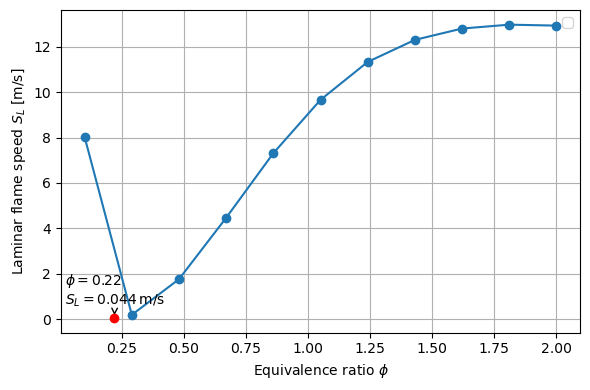

In [ ]:

# 格式化绘图
plt.xlabel('Equivalence ratio $\\phi$')
plt.ylabel('Laminar flame speed $S_L$ [m/s]')
plt.title('H$_2$–air laminar flame speed under different P, T')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 保存为 CSV
df = pd.DataFrame(results)
csv_filename = 'flame_speeds_multi.csv'
df.to_csv(csv_filename, index=False)
print(f"Saved all curves to {csv_filename}")